# k-NearestNeighbors

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np 
import matplotlib.pyplot as plt # to visualize only 
import pandas as pd

In [2]:
x = pd.read_csv("./data/processed_x.csv", delimiter=",", header = None) # load from processed images

In [3]:
x = x.values
x = x.astype(np.float32)
x /= 255

In [4]:
y = pd.read_csv("./data/train_y.csv", delimiter = ",", header = None)
y = (y.values).ravel()

In [5]:
#visualizing 5 images indexes in array images by start and shows corresponding labels
def plotter(images, labels, start):
    plt.figure(figsize=(20,4))
    for index, (image, label) in enumerate(zip(images[start:start+5], labels[start:start+5])):
        plt.subplot(1, 5, index + 1)
        plt.imshow(np.reshape(image, (64,64)), cmap= 'gray')
        plt.title('Training: %i\n' % label, fontsize = 20)

In [8]:
#checking data was loaded in correctyl 
#plotter(x, y, 1100)

In [9]:
#splitting the data into random training and validation set, right now using 1/10 as validation (5000 instances)
#this is `splitting the processed data

np.random.seed(100)
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(
    x, y, test_size=1/10.0, random_state=0)

In [11]:
neigh = KNeighborsClassifier(n_neighbors=4000, weights = 'distance', algorithm = 'kd_tree', n_jobs = 2)

In [12]:
neigh.fit(train_x, train_y)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=2, n_neighbors=1000, p=2,
           weights='uniform')

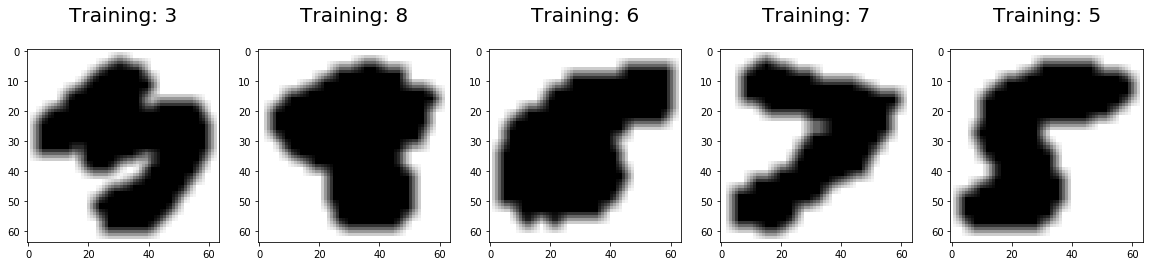

In [16]:
plotter(valid_x, valid_y, 0)

In [17]:
#~took 21 minutes
predictions = neigh.predict(valid_x)

In [18]:
corr = 0

for i, pred in enumerate(predictions):
    if pred == valid_y[i]:
        corr += 1

acc = corr/len(valid_y)
print("Accuracy: " + str(acc))

Accuracy: 0.7358
